In [2]:
import numpy as np
from cellpose import models, core, io, plot, utils
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted
import pandas as pd
import seaborn as sns
from skimage.measure import label, regionprops

ImportError: cannot import name 'models' from 'cellpose' (unknown location)

In [ ]:
ls ..\Images\Kaden

In [28]:
directory = '/Users/labadmin/Desktop/Images/Kaden'
files = io.get_image_files(directory, mask_filter=[], look_one_level_down=True)

In [29]:
files

['/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_CH3.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_Overlay.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3F&B_40x_CH3.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3_F&B_40x_Overlay.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_CH3.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_Overlay.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice2F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice2F&B_40x_CH3.tif',
 '/

In [30]:
ch2_files = list(filter(lambda s: "CH2" in s, files)) 
ch4_files = list(filter(lambda s: "CH4" in s, files)) 

In [31]:
ch2_files

['/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice2F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse3Slice1S&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse3Slice2_S&B_40x_CH2.tif']

In [32]:
ch4_files

['/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice2F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse3Slice1S&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images/Kaden\\Mouse3Slice2_S&B_40x_CH4.tif']

In [33]:
labels = io.get_label_files(ch2_files, mask_filter='_seg.npy')

In [37]:
labels

[['/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice2F&B_40x_CH2_seg.npy',
  '/Users/labadmin/Desktop/Images/Kaden\\Mouse1Slice3F&B_40x_CH2_seg.npy',
  '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice1_F&B_40x_CH2_seg.npy',
  '/Users/labadmin/Desktop/Images/Kaden\\Mouse2Slice2F&B_40x_CH2_seg.npy',
  '/Users/labadmin/Desktop/Images/Kaden\\Mouse3Slice1S&B_40x_CH2_seg.npy',
  '/Users/labadmin/Desktop/Images/Kaden\\Mouse3Slice2_S&B_40x_CH2_seg.npy'],
 None]

In [89]:
for i in range(6):
    print(i)

0
1
2
3
4
5


In [93]:
primary_id = 1
rows = []
for i in range(len(ch2_files)):
    dat = np.load(labels[0][i], allow_pickle=True).item()
    img = io.imread(ch2_files[i])
    ch4_img = io.imread(ch4_files[i])
    
    labeled_image, count = label(dat['masks'], return_num=True)

    #change numerical here
    file_name = labels[0][i].split("/")[-1].split("\\")[1]
    
    props = regionprops(labeled_image, intensity_image=img[:,:,1])
    ch4_props = regionprops(labeled_image, intensity_image=ch4_img[:,:,2])
    
    for p in props:
        mean_gfp = p.mean_intensity
        area = p.area
        rows.append({"file": file_name, "primary_id": primary_id, "nucleus_id": p.label, "area_px": area, "mean_gfp": mean_gfp})
    
    for p in ch4_props:
        mean_s647 = p.mean_intensity
        area = p.area
        rows.append({"file": file_name, "primary_id" : primary_id, "nucleus_id": p.label, "area_px": area, "mean_s647": mean_s647})

    primary_id += 1





In [94]:
df = pd.DataFrame(rows)

In [95]:
df

,file,primary_id,nucleus_id,area_px,mean_gfp,mean_s647
0,Mouse1Slice2F&B_40x_CH2_seg.npy,1,1,153.0,44.777778,NaN
1,Mouse1Slice2F&B_40x_CH2_seg.npy,1,2,93.0,39.591398,NaN
2,Mouse1Slice2F&B_40x_CH2_seg.npy,1,3,140.0,40.592857,NaN
3,Mouse1Slice2F&B_40x_CH2_seg.npy,1,1,153.0,NaN,27.575163
4,Mouse1Slice2F&B_40x_CH2_seg.npy,1,2,93.0,NaN,41.236559
...,...,...,...,...,...,...
241,Mouse3Slice2_S&B_40x_CH2_seg.npy,6,16,235.0,NaN,31.565957
242,Mouse3Slice2_S&B_40x_CH2_seg.npy,6,17,177.0,NaN,32.237288
243,Mouse3Slice2_S&B_40x_CH2_seg.npy,6,18,265.0,NaN,35.671698
244,Mouse3Slice2_S&B_40x_CH2_seg.npy,6,19,335.0,NaN,32.414925


In [100]:
ls ..\Images\Kaden

 Volume in drive C has no label.
 Volume Serial Number is EA40-4521

 Directory of C:\Users\labadmin\Desktop\Images\Kaden

10/09/2025  01:34 PM    <DIR>          .
10/07/2025  03:36 PM    <DIR>          ..
10/08/2025  02:49 PM           350,259 Mouse1Slice2F&B_40x_CH2.tif
10/09/2025  01:25 PM         6,248,777 Mouse1Slice2F&B_40x_CH2_seg.npy
10/08/2025  02:49 PM           439,220 Mouse1Slice2F&B_40x_CH3.tif
10/08/2025  02:50 PM           421,769 Mouse1Slice2F&B_40x_CH4.tif
10/08/2025  02:50 PM           911,608 Mouse1Slice2F&B_40x_Overlay.tif
10/08/2025  02:52 PM           946,796 Mouse1Slice3_F&B_40x_Overlay.tif
10/08/2025  02:52 PM           351,255 Mouse1Slice3F&B_40x_CH2.tif
10/09/2025  01:28 PM         6,426,491 Mouse1Slice3F&B_40x_CH2_seg.npy
10/08/2025  02:52 PM           480,643 Mouse1Slice3F&B_40x_CH3.tif
10/08/2025  02:52 PM           417,711 Mouse1Slice3F&B_40x_CH4.tif
10/08/2025  02:56 PM           419,671 Mouse2Slice1_F&B_40x_CH2.tif
10/09/2025  01:21 PM         6,168,939 

In [101]:
df.to_csv("../Images/Kaden/s647-v5.csv", index=False)

In [70]:
dat = np.load(labels[0][0], allow_pickle=True).item()
img = io.imread(ch2_files[0])
ch4_img = io.imread(ch4_files[0])

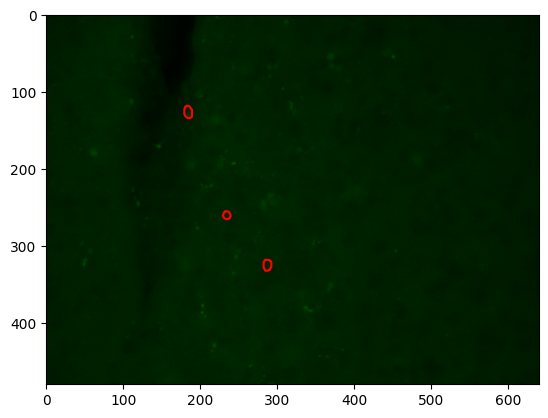

In [41]:
# plot image with masks overlaid
mask_RGB = plot.mask_overlay(img, dat['masks'],
                        colors=np.array(dat['colors']))

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(img)
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

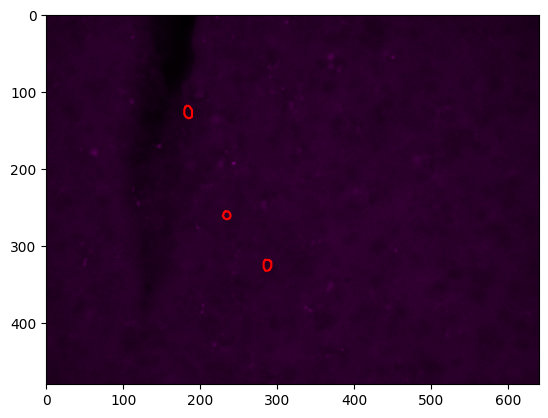

In [87]:
# plot image with masks overlaid
mask_RGB = plot.mask_overlay(ch4_img, dat['masks'],
                        colors=np.array(dat['colors']))

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(ch4_img)
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

In [57]:
dat['masks'].shape

(480, 640)

In [45]:
dat['masks'].max()

np.uint16(3)

In [51]:
pd.Series(dat['masks'].flatten()).value_counts()

0    306814
1       153
3       140
2        93
Name: count, dtype: int64

In [52]:
labeled_image, count = label(dat['masks'], return_num=True)

In [82]:
labels[0][0].split("/")[-1].split("\\")[1]

'Mouse1Slice2F&B_40x_CH2_seg.npy'

In [84]:
#change numerical here
file_name = labels[0][0].split("/")[-1].split("\\")[1]

props = regionprops(labeled_image, intensity_image=img[:,:,1])
ch4_props = regionprops(labeled_image, intensity_image=ch4_img[:,:,2])
primary_id = 1
rows = []
for p in props:
    mean_gfp = p.mean_intensity
    area = p.area
    rows.append({"file": file_name, "primary_id": primary_id, "nucleus_id": p.label, "area_px": area, "mean_gfp": mean_gfp})

for p in ch4_props:
    mean_s647 = p.mean_intensity
    area = p.area
    rows.append({"file": file_name, "primary_id" : primary_id, "nucleus_id": p.label, "area_px": area, "mean_s647": mean_s647})



In [86]:
pd.DataFrame(rows)

,file,primary_id,nucleus_id,area_px,mean_gfp,mean_s647
0,Mouse1Slice2F&B_40x_CH2_seg.npy,1,1,153.0,44.777778,NaN
1,Mouse1Slice2F&B_40x_CH2_seg.npy,1,2,93.0,39.591398,NaN
2,Mouse1Slice2F&B_40x_CH2_seg.npy,1,3,140.0,40.592857,NaN
3,Mouse1Slice2F&B_40x_CH2_seg.npy,1,1,153.0,NaN,27.575163
4,Mouse1Slice2F&B_40x_CH2_seg.npy,1,2,93.0,NaN,41.236559
5,Mouse1Slice2F&B_40x_CH2_seg.npy,1,3,140.0,NaN,39.221429


In [64]:
img.shape

(480, 640, 3)

In [62]:
p.mean_intensity

array([ 0.        , 40.59285714,  0.        ])

In [69]:
rows

[{'nucleus_id': 1,
  'area_px': np.float64(153.0),
  'mean_gfp': np.float64(44.77777777777778)},
 {'nucleus_id': 2,
  'area_px': np.float64(93.0),
  'mean_gfp': np.float64(39.59139784946237)},
 {'nucleus_id': 3,
  'area_px': np.float64(140.0),
  'mean_gfp': np.float64(40.59285714285714)}]

In [59]:
props

In [54]:
labeled_image.shape

(480, 640)

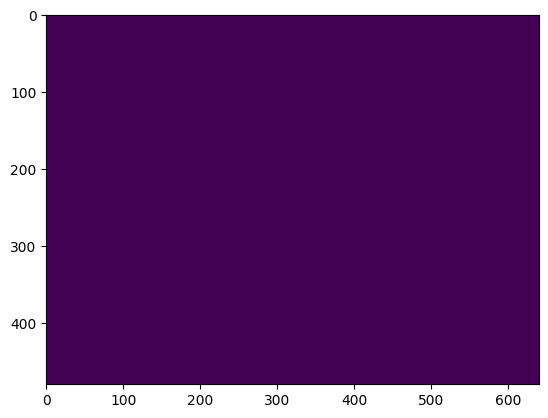

In [67]:
plt.imshow(img[:,:,2])

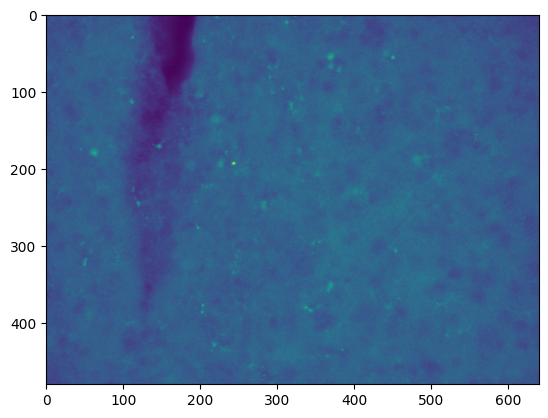

In [72]:
plt.imshow(ch4_img[:,:,0])

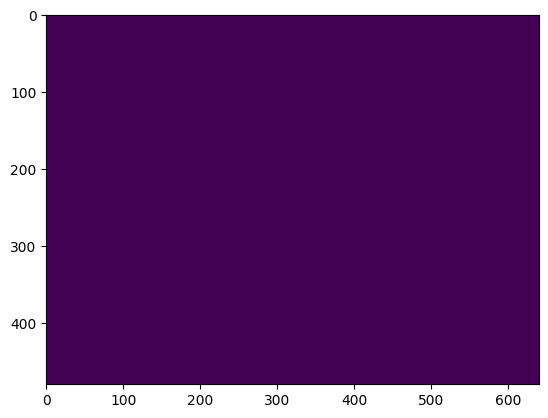

In [73]:
plt.imshow(ch4_img[:,:,1])

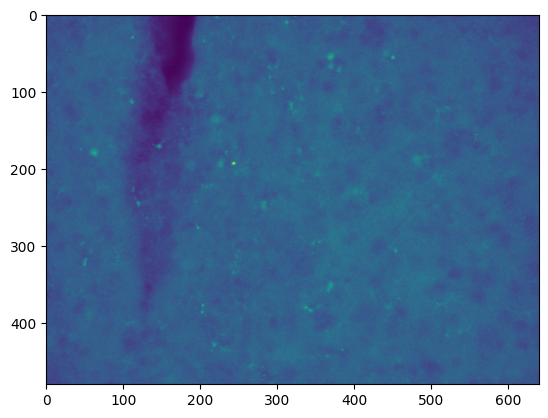

In [74]:
plt.imshow(ch4_img[:,:,2])